<a href="https://colab.research.google.com/github/blessjal/practicums/blob/master/lung_data_with_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from scipy.io import arff
from io import StringIO


data, meta = arff.loadarff('/content/sample_data/ThoraricSurgery.arff')



In [ ]:
df = pd.DataFrame(data)
df

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,b'DGN2',2.88,2.16,b'PRZ1',b'F',b'F',b'F',b'T',b'T',b'OC14',b'F',b'F',b'F',b'T',b'F',60.0,b'F'
1,b'DGN3',3.40,1.88,b'PRZ0',b'F',b'F',b'F',b'F',b'F',b'OC12',b'F',b'F',b'F',b'T',b'F',51.0,b'F'
2,b'DGN3',2.76,2.08,b'PRZ1',b'F',b'F',b'F',b'T',b'F',b'OC11',b'F',b'F',b'F',b'T',b'F',59.0,b'F'
3,b'DGN3',3.68,3.04,b'PRZ0',b'F',b'F',b'F',b'F',b'F',b'OC11',b'F',b'F',b'F',b'F',b'F',54.0,b'F'
4,b'DGN3',2.44,0.96,b'PRZ2',b'F',b'T',b'F',b'T',b'T',b'OC11',b'F',b'F',b'F',b'T',b'F',73.0,b'T'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,b'DGN2',3.88,2.12,b'PRZ1',b'F',b'F',b'F',b'T',b'F',b'OC13',b'F',b'F',b'F',b'T',b'F',63.0,b'F'
466,b'DGN3',3.76,3.12,b'PRZ0',b'F',b'F',b'F',b'F',b'F',b'OC11',b'F',b'F',b'F',b'T',b'F',61.0,b'F'
467,b'DGN3',3.04,2.08,b'PRZ1',b'F',b'F',b'F',b'T',b'F',b'OC13',b'F',b'F',b'F',b'F',b'F',52.0,b'F'
468,b'DGN3',1.96,1.68,b'PRZ1',b'F',b'F',b'F',b'T',b'T',b'OC12',b'F',b'F',b'F',b'T',b'F',79.0,b'F'


In [ ]:
colnames = ['Diagnosis', 'FVC', 'FEV1', 'Performance Status', 'Pain', 'Hemoptysis', 'Dyspnea', 'Cough', 'Weakness', 'T Stage', 'DM2', 'MI', 'PAD', 'Smoking', 'Asthma', 'Age', 'Survival']

In [ ]:
df.columns = colnames

In [ ]:
df.head()

,Diagnosis,FVC,FEV1,Performance Status,Pain,Hemoptysis,Dyspnea,Cough,Weakness,T Stage,DM2,MI,PAD,Smoking,Asthma,Age,Survival
0,b'DGN2',2.88,2.16,b'PRZ1',b'F',b'F',b'F',b'T',b'T',b'OC14',b'F',b'F',b'F',b'T',b'F',60.0,b'F'
1,b'DGN3',3.40,1.88,b'PRZ0',b'F',b'F',b'F',b'F',b'F',b'OC12',b'F',b'F',b'F',b'T',b'F',51.0,b'F'
2,b'DGN3',2.76,2.08,b'PRZ1',b'F',b'F',b'F',b'T',b'F',b'OC11',b'F',b'F',b'F',b'T',b'F',59.0,b'F'
3,b'DGN3',3.68,3.04,b'PRZ0',b'F',b'F',b'F',b'F',b'F',b'OC11',b'F',b'F',b'F',b'F',b'F',54.0,b'F'
4,b'DGN3',2.44,0.96,b'PRZ2',b'F',b'T',b'F',b'T',b'T',b'OC11',b'F',b'F',b'F',b'T',b'F',73.0,b'T'


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Diagnosis           470 non-null    object 
 1   FVC                 470 non-null    float64
 2   FEV1                470 non-null    float64
 3   Performance Status  470 non-null    object 
 4   Pain                470 non-null    object 
 5   Hemoptysis          470 non-null    object 
 6   Dyspnea             470 non-null    object 
 7   Cough               470 non-null    object 
 8   Weakness            470 non-null    object 
 9   T Stage             470 non-null    object 
 10  DM2                 470 non-null    object 
 11  MI                  470 non-null    object 
 12  PAD                 470 non-null    object 
 13  Smoking             470 non-null    object 
 14  Asthma              470 non-null    object 
 15  Age                 470 non-null    float64
 16  Survival

In [ ]:
todummy_list = ['Diagnosis', 'PAD','Performance Status', 'Pain', 'Hemoptysis', 'Dyspnea', 'Cough', 'Weakness', 'T Stage', 'DM2', 'MI', 'Asthma', 'Smoking', 'Survival']

def dummy_df(df, todummy_list):
    for x in todummy_list:
        dummies = pd.get_dummies(df[x], prefix=x, dummy_na=False)
        df = df.drop(x, axis=1)
        df = pd. concat([df, dummies], axis=1)
    return df

In [ ]:
df = dummy_df(df, todummy_list).drop(["PAD_b'F'", "Pain_b'F'", "Hemoptysis_b'F'", "Dyspnea_b'F'", "Cough_b'F'", "Weakness_b'F'", "DM2_b'F'", "MI_b'F'", "Asthma_b'F'", "Smoking_b'F'", "Survival_b'F'"], axis=1)

In [ ]:
df.head()

,FVC,FEV1,Age,Diagnosis_b'DGN1',Diagnosis_b'DGN2',Diagnosis_b'DGN3',Diagnosis_b'DGN4',Diagnosis_b'DGN5',Diagnosis_b'DGN6',Diagnosis_b'DGN8',PAD_b'T',Performance Status_b'PRZ0',Performance Status_b'PRZ1',Performance Status_b'PRZ2',Pain_b'T',Hemoptysis_b'T',Dyspnea_b'T',Cough_b'T',Weakness_b'T',T Stage_b'OC11',T Stage_b'OC12',T Stage_b'OC13',T Stage_b'OC14',DM2_b'T',MI_b'T',Asthma_b'T',Smoking_b'T',Survival_b'T'
0,2.88,2.16,60.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0
1,3.40,1.88,51.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,2.76,2.08,59.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0
3,3.68,3.04,54.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,2.44,0.96,73.0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,1,1,0,0,0,0,0,0,1,1


In [ ]:
df.shape

(470, 28)

In [ ]:
features = df.drop("Survival_b'T'", axis=1)
target = df["Survival_b'T'"]

In [ ]:
features.columns

Index(['FVC', 'FEV1', 'Age', 'Diagnosis_b'DGN1'', 'Diagnosis_b'DGN2'',
       'Diagnosis_b'DGN3'', 'Diagnosis_b'DGN4'', 'Diagnosis_b'DGN5'',
       'Diagnosis_b'DGN6'', 'Diagnosis_b'DGN8'', 'PAD_b'T'',
       'Performance Status_b'PRZ0'', 'Performance Status_b'PRZ1'',
       'Performance Status_b'PRZ2'', 'Pain_b'T'', 'Hemoptysis_b'T'',
       'Dyspnea_b'T'', 'Cough_b'T'', 'Weakness_b'T'', 'T Stage_b'OC11'',
       'T Stage_b'OC12'', 'T Stage_b'OC13'', 'T Stage_b'OC14'', 'DM2_b'T'',
       'MI_b'T'', 'Asthma_b'T'', 'Smoking_b'T''],
      dtype='object')

In [ ]:
features_cols = ["FVC", "FEV1", "Age", "DGN1", "DGN2", "DGN3",  "DGN4", "DGN5", "DGN6", "DGN8", "PAD", "PFS0", "PFS1", "PFS2", "Pain", "Hemoptysis", "Dyspnea", "Cough", "Weakness", "StageOC11", "StageOC12", "StageOC13", "StageOC14", "DM2", "MI", "Asthma", "Smoking"]
features.columns = features_cols
features.head()

,FVC,FEV1,Age,DGN1,DGN2,DGN3,DGN4,DGN5,DGN6,DGN8,PAD,PFS0,PFS1,PFS2,Pain,Hemoptysis,Dyspnea,Cough,Weakness,StageOC11,StageOC12,StageOC13,StageOC14,DM2,MI,Asthma,Smoking
0,2.88,2.16,60.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,1
1,3.40,1.88,51.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,2.76,2.08,59.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1
3,3.68,3.04,54.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,2.44,0.96,73.0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,1,1,0,0,0,0,0,0,1


In [ ]:
target.columns = 'Survival'

target.value_counts()

0    400
1     70
Name: Survival_b'T', dtype: int64

In [ ]:
sm = SMOTE()

features_res, target_res = sm.fit_resample(features, target)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_res, target_res, test_size=0.3, random_state=42)

print('X_train {0}, y_train {1}'.format(X_train.shape, y_train.shape))
print('X_test {0}, y_test {1}'.format(X_test.shape, y_test.shape))

X_train (560, 27), y_train (560,)
X_test (240, 27), y_test (240,)


In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
y_train_res[:5]

array([0, 0, 0, 1, 0], dtype=uint8)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train_res, y_train_res)

lr_pred = logreg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, plot_confusion_matrix, classification_report

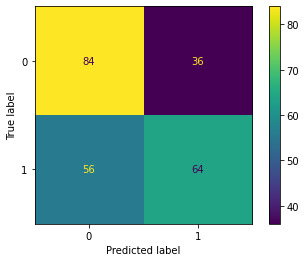

In [ ]:
plot_confusion_matrix(logreg, X_test, y_test)

In [ ]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.60      0.70      0.65       120
           1       0.64      0.53      0.58       120

    accuracy                           0.62       240
   macro avg       0.62      0.62      0.61       240
weighted avg       0.62      0.62      0.61       240



In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold,  GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()

rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

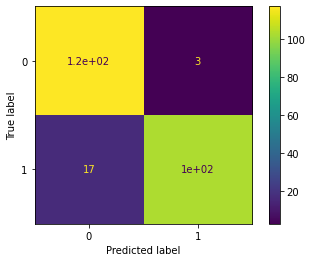

In [ ]:
plot_confusion_matrix(rf, X_test, y_test)

In [ ]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       120
           1       0.97      0.86      0.91       120

    accuracy                           0.92       240
   macro avg       0.92      0.92      0.92       240
weighted avg       0.92      0.92      0.92       240



In [ ]:
import numpy as np
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=None)


rf_scores = cross_val_score(rf, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(rf_scores))  

0.905952380952381


In [103]:
from sklearn.model_selection import GridSearchCV
RandomForestClassifier()
# define grid
grid = {'n_estimators': [100, 200], 'criterion': ['gini', 'entropy'], 'max_leaf_nodes': [int, None], 'bootstrap': [True, False] }

# define search
search = GridSearchCV(rf, grid, scoring='accuracy', cv=cv, n_jobs=-1)

# fit the search
rf_results = search.fit(X_train, y_train)

# summarize
print('Mean Accuracy: %.3f' % rf_results.best_score_)
print('The best parameters of the random forest model: %s' % rf_results.best_params_)

Mean Accuracy: 0.912
The best parameters of the random forest model: {'bootstrap': False, 'criterion': 'gini', 'max_leaf_nodes': None, 'n_estimators': 100}


In [122]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input
from keras.metrics import mean_squared_error, Accuracy
from keras.losses import sparse_categorical_crossentropy, categorical_crossentropy

In [105]:
model = Sequential([
    Input(shape=(X_train.shape[1],), name='input'),
    Dense(20, activation='relu', name='layer1'),
    Dense(10, activation='relu', name='layer2'),
    Dense(5, activation='softmax', name='layer3'),
    Dense(1, name='layer4')
])

In [125]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['Accuracy'])

In [126]:
model.fit(X_train, y_train, batch_size=32, epochs=50, verbose=1, validation_data=(X_test, y_test))

Epoch 1/50
18/18 [==============================] - 1s 15ms/step - loss: 6.0199e-08 - accuracy: 0.0000e+00 - val_loss: 5.9605e-08 - val_accuracy: 0.0000e+00
Epoch 2/50
18/18 [==============================] - 0s 5ms/step - loss: 5.6875e-08 - accuracy: 0.0000e+00 - val_loss: 5.9605e-08 - val_accuracy: 0.0000e+00
Epoch 3/50
18/18 [==============================] - 0s 5ms/step - loss: 5.8564e-08 - accuracy: 0.0000e+00 - val_loss: 5.9605e-08 - val_accuracy: 0.0000e+00
Epoch 4/50
18/18 [==============================] - 0s 4ms/step - loss: 5.7187e-08 - accuracy: 0.0000e+00 - val_loss: 5.9605e-08 - val_accuracy: 0.0000e+00
Epoch 5/50
18/18 [==============================] - 0s 4ms/step - loss: 5.6535e-08 - accuracy: 0.0000e+00 - val_loss: 5.9605e-08 - val_accuracy: 0.0000e+00
Epoch 6/50
18/18 [==============================] - 0s 4ms/step - loss: 5.7778e-08 - accuracy: 0.0000e+00 - val_loss: 5.9605e-08 - val_accuracy: 0.0000e+00
Epoch 7/50
18/18 [==============================] - 0s 4ms/step

In [127]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 20)                560       
_________________________________________________________________
layer2 (Dense)               (None, 10)                210       
_________________________________________________________________
layer3 (Dense)               (None, 5)                 55        
_________________________________________________________________
layer4 (Dense)               (None, 1)                 6         
Total params: 831
Trainable params: 831
Non-trainable params: 0
_________________________________________________________________


In [130]:
predictions = model.predict(X_test, batch_size=32, verbose=1)

8/8 [==============================] - 0s 2ms/step


In [118]:
(model.compiled_metrics)

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns

In [137]:
# sns.lineplot(x=predictions, y=y_test)
y_test.size

240

In [136]:
predictions.size

240

In [140]:
pd.DataFrame({'Actual': y_test,
              'Predicted': predictions.flatten()})

,Actual,Predicted
0,1,0.140093
1,1,0.495091
2,0,0.265681
3,1,0.544079
4,0,0.001048
...,...,...
235,1,0.765022
236,0,0.257674
237,0,0.312462
238,1,-0.030523
